HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-18300479289995128867\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-11950722650186923034\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-18300479289995128867\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

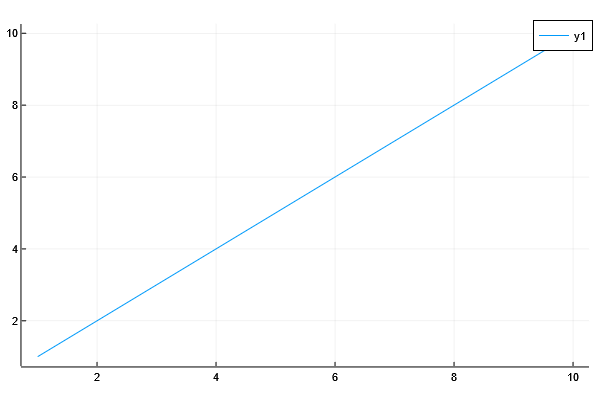

In [2]:
using Plots
plotlyjs()
plot(1:10)

In [10]:
include("../src/test.jl")

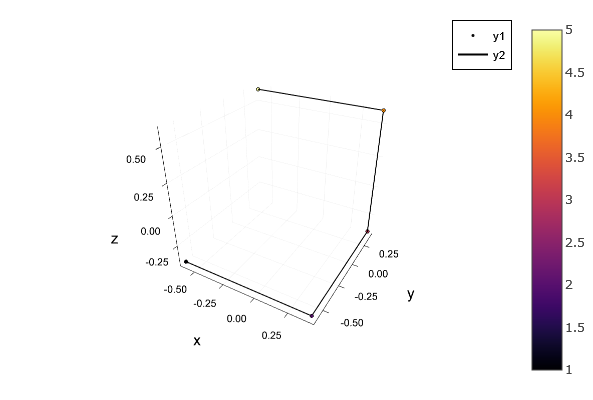

In [3]:
a = Point(0.0,0.0,0.0)
b = Point(1.0,0.0,0.0)
c = Point(1.0,1.0,0.0)
d = Point(1.0,1.0,1.0)
e = Point(0.0,1.0,1.0)
P = PolygonalChain([a,b,c,d,e])
#dihedralRotate!(P,2,pi/4)
centerChain!(P)
plot()
plotChain!(centerChain(P),"red")

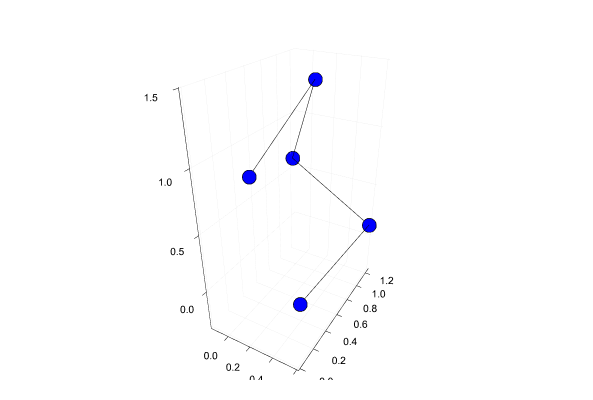

In [44]:
randomRot = rotation(2*pi*rand(),unitVector(Point()))
c = Point()
newArr = [randomRot*p + c + 0.3*Point() for p in P.vertices]
Q = PolygonalChain(newArr)
plot(legend=false)
plotChain!(Q,"blue")

In [45]:
P = centerChain(P)
Q = centerChain(Q)
mat = optimalRotation(P,Q)
S = PolygonalChain([mat*p for p in P.vertices])
p = plot(legend=false)
plotChain!(S,"blue")
plotChain!(Q,"red")
println(simpleRmsd(P,Q))
println(overlapedRmsd(P,Q))

0.9883336441909575
0.12044232875159168


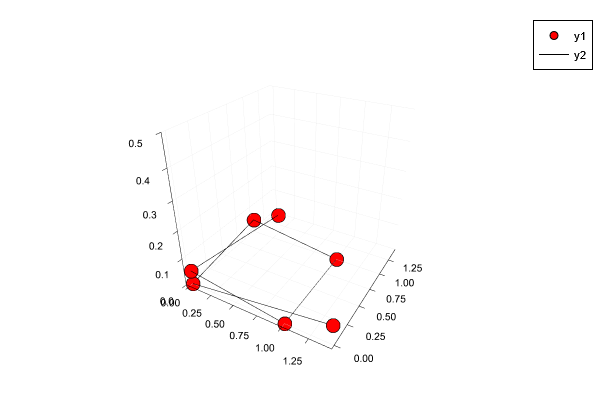

In [62]:
epsilon = 0.05
l = sqrt(2)
v0 = l*ey + epsilon*ex
v1 = epsilon*ez
v2 = ex
v3 = ex + ey
v4 = ey + + epsilon*ez
v5 = e0
v6 = l*ex + epsilon*ey + epsilon*ez
P = PolygonalChain([v0,v1,v2,v3,v4,v5,v6])
plot(zlim=(0,0.5))
plotChain!(P,"red")

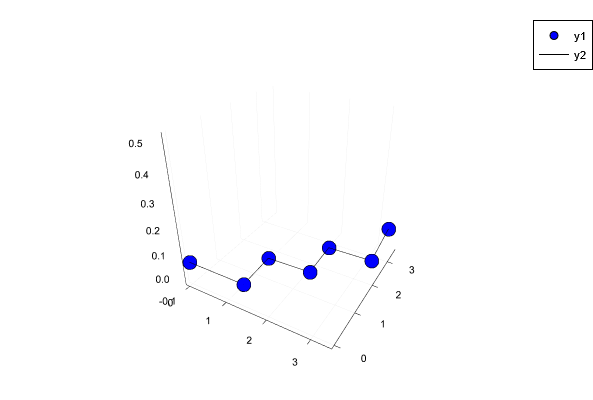

In [63]:
Q = flatten(P)
plot(zlim=(-0.1,0.5))
plotChain!(Q,"blue")

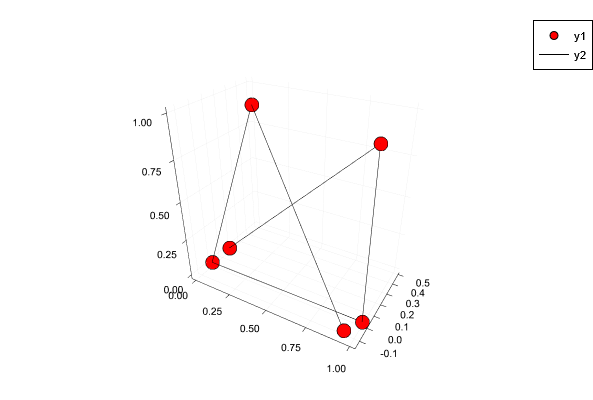

In [59]:
P = knittingNeedle(sqrt(2))
p = plot()
plotChain!(P,"red")

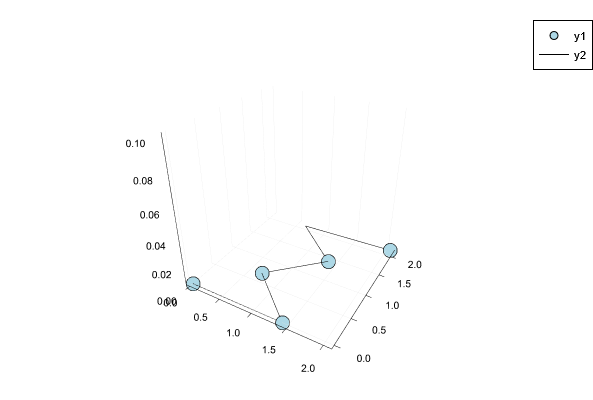

In [60]:
Q = flatten(P)
p = plot(zlim=(0,0.1))
plotChain!(Q,"lightblue")

In [61]:
internalCoordinates(Q)

([1.4142135623730951, 1.0, 1.0, 1.0, 1.4142135623730956], [0.7505598546399694, 1.5707963267948966, 1.5707963267948966, 0.7922476926991777], [3.141592653589793, 3.141592653589793, 3.141592653589793])

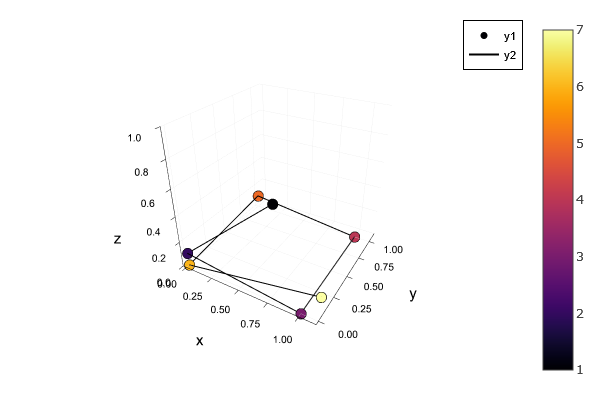

In [11]:
Q = fourKnot(1.1)
p = plot(zlim=(0,1))
plotChain!(Q,"lightblue")
display(p)

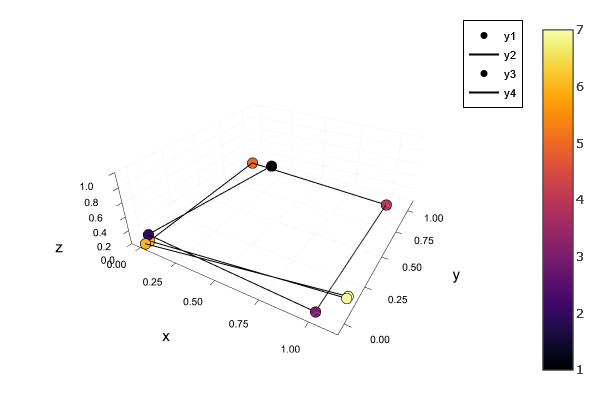

In [12]:
newQ = dihedralRotate(Q,1,-pi/10)
plotChain!(newQ,"red")
display(p)